# Vaccination Tweets: Exploratory Data Analysis

![twitter](twitter.png)

## INTRODUCTION

***

### Dataset overview

The dataset used here was collected by Gabriel Preda and [available on Kaggle](https://www.kaggle.com/gpreda/all-covid19-vaccines-tweets). https://www.kaggle.com/gpreda/all-covid19-vaccines-tweets about Pfizer/BioNTech, Sinopharm, Sinovac (both Chinese-produced vaccines), Moderna, Oxford/Astra-Zeneca, Covaxin and Sputnik V, collection once a day (initially twice).

**The dataset contains 8079 observations for 15 features.**

| FEATURE | description | comment |
|----|----|----|
| **id** | 39547 entries | length max. 140 characters |
| **user_location** | non-systematic information about the users location | hardly usable |
| **user_description** | self-descriptions of users | not used in analysis |
| **user_created** | date of account creations | - |
| **user_followers** | no. of people who follow the user | - |
| **user_friends** | number of users which a specified user follows |
| **user_favourites** | favourite users of a user | - |
| **user_verified** | status granted by twitter to influential or institutionally approved sources | - |
| **date** | date of tweet | - |
| **text** | text of the tweet | - |
| **hashtags** | hashtag(s) used as a topic reference | - |
| **source** | ratio (in percent) between population fully immunized and total population | - |
| **retweets** | no. of retweets for a tweet | - |
| **favorites** | no. of occasions a tweet has been another users 'favourite' | typical use is to express agreement |
| **is_retweets** | whether or not tweet is a retweet | no retweets in the data set |

***


### Twitter

Vaccinations, vaccines and vaccination-related political decisions have been shared on twitter, a major social network particularly suitable for eliciting opinions. Looking at sentiments expressed in relation to these topics might give insights into opinions and even their sources. However, although twitter is occasionally referred to as a modern public square, twitter users are not necessarily a representative sample of the population in general (see e.g. https://www.pewresearch.org/internet/2019/04/24/sizing-up-twitter-users/ for the US-context)

Also, in a globally collected dataset, not necessarily the same set of people responds to the same set of issues around vaccination. The data e.g. on vaccines cannot automatically be taken to represent globally shared opinions. Often, tweets may refer to local political events or vaccines produced or applied in certain countries.

The sentiment analysis makes the following working assumptions: More often than not, the overall sentiment score of a tweet represents an attitude towards vaccines or vaccinations of a similar degree and with similar valence. The ratio between positive, negative and neutral tweets can represent a general ratio of positive, negative or neutral sentiments towards vaccinations and vaccines.


***

#### China, India, and Russia

As the EDA shows, India and China and Russia are very strongly represented in this dataset. The following explanations regarding the different mentioned vaccines should be helpful:

| VACCINE | type of vaccine | country |
|----|----|----|
| Sinopharm | INACTIVATED virus | China |
| Sinovac | INACTIVATED virus | China |
| Covaxin (Bharat Biotech) | INACTIVATED virus | China, India |
| Oxford/AstraZeneca | RECOMBINANT (non-replicating viral vector) | India |
| Pfizer/BioNTech | messenger RNA (mRNA) (nucleoside-modified) | Israel |
| Moderna | messenger RNA (mRNA) (nucleoside-modified) | Israel |
| Sputnik V | RECOMBINANT (non-replicating viral vector) | Russia |

An overview of clinical trials and vaccine authorisations by country can be found [here](https://covid19.trackvaccines.org/trials-vaccines-by-country/).

An overview of the different types of vaccines can be found [here](https://www.who.int/news-room/feature-stories/detail/the-race-for-a-covid-19-vaccine-explained).


***

### Key objectives

- Analyze frequent words, handles, topics and hashtags
- Perform sentiment analysis on tweet texts
- Analyze sentiments with respect to vaccines
- Analyze and explain tweet numbers and sentiments over time


***
***

# Content

| **Main Sections** |
|----|
| 1. Read and inspect dataset | 
| 2. First investigation analyses and feature engineering | 
| 3. Exploiting the feature 'text' for information on frequent words, hashtags, handles | 
| 4. Exploiting the feature 'hashtags' for information on frequent words, hashtags, handlesOxford/AstraZeneca | 
| 5. Sentiment analysis | messenger RNA (mRNA) (nucleoside-modified) | 
| 6. Sentiment visualizations | messenger RNA (mRNA) (nucleoside-modified) | 



In [87]:
# Main data packages. 
import numpy as np
import pandas as pd
from datetime import datetime

import pickle

#text processing, NLP modules
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

#sentiment analysis
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
#plotting
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# 1. Read and inspect dataset

In [88]:
#nltk.download('punkt')
#nltk.download('wordnet')

In [89]:
df = pd.read_csv("Data/vaccination_tweets.csv")

In [90]:
df_tweety = df.copy()

In [91]:
shape = df_tweety.shape
print('The unmodified vaccination tweets dataset contains {} columns and {} rows.'.format(shape[1], shape[0]))

The unmodified vaccination tweets dataset contains 16 columns and 38547 rows.


In [92]:
df_tweety.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38547 entries, 0 to 38546
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                38547 non-null  int64 
 1   user_name         38547 non-null  object
 2   user_location     29767 non-null  object
 3   user_description  35940 non-null  object
 4   user_created      38547 non-null  object
 5   user_followers    38547 non-null  int64 
 6   user_friends      38547 non-null  int64 
 7   user_favourites   38547 non-null  int64 
 8   user_verified     38547 non-null  bool  
 9   date              38547 non-null  object
 10  text              38547 non-null  object
 11  hashtags          30330 non-null  object
 12  source            38514 non-null  object
 13  retweets          38547 non-null  int64 
 14  favorites         38547 non-null  int64 
 15  is_retweet        38547 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 4.2+ MB


In [93]:
df_tweety.describe().round(2)

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,3.854700e+04,38547.00,38547.00,38547.00,38547.00,38547.00
mean,1.365051e+18,109675.74,1309.57,15013.42,3.11,13.75
std,8.619936e+15,882398.75,6020.04,41677.98,33.87,184.20
min,1.337728e+18,0.00,0.00,0.00,0.00,0.00
25%,1.362003e+18,120.00,144.00,360.00,0.00,0.00
50%,1.366887e+18,577.00,417.00,2146.00,0.00,1.00
75%,1.371547e+18,2780.50,1189.00,11272.00,1.00,4.00
max,1.375348e+18,14906907.00,380428.00,1205878.00,2360.00,22815.00


In [94]:
df_tweety.isnull().sum()

id                  0   
user_name           0   
user_location       8780
user_description    2607
user_created        0   
user_followers      0   
user_friends        0   
user_favourites     0   
user_verified       0   
date                0   
text                0   
hashtags            8217
source              33  
retweets            0   
favorites           0   
is_retweet          0   
dtype: int64

No tweets in this dataset are retweets.

In [95]:
df_tweety["is_retweet"].unique()

array([False])

In [96]:
#Insert column 'day' to map the vaccination progress data set
df_tweety['day'] = pd.to_datetime(df_tweety.date).dt.date

In [97]:
df_tweety.dtypes

id                  int64 
user_name           object
user_location       object
user_description    object
user_created        object
user_followers      int64 
user_friends        int64 
user_favourites     int64 
user_verified       bool  
date                object
text                object
hashtags            object
source              object
retweets            int64 
favorites           int64 
is_retweet          bool  
day                 object
dtype: object

# 2. First investigation analyses and feature engineering

## 2.1 Dropping and duplicates

In [98]:
#'user_location' is a highly diverse category
df_tweety.user_location.nunique()

8098

In [99]:
df_tweety = df_tweety.drop(['id', 'user_created', 'is_retweet', 'source', 'user_description'], axis=1).drop_duplicates(['user_name', 'text'], keep='last')

In [100]:
#df_tweety.index.name = 'id'

In [101]:
df_tweety.reset_index(inplace=True)

In [102]:
df_tweety

,index,user_name,user_location,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,retweets,favorites,day
0,0,Rachel Roh,"La Crescenta-Montrose, CA",405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],0,0,2020-12-20
1,1,Albert Fong,"San Francisco, CA",834,666,178,False,2020-12-13 16:27:13,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",NaN,1,1,2020-12-13
2,2,eli🇱🇹🇪🇺👌,Your Bed,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",0,0,2020-12-12
3,3,Charles Adler,"Vancouver, BC - Canada",49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",NaN,446,2129,2020-12-12
4,4,Citizen News Channel,NaN,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,"['whereareallthesickpeople', 'PfizerBioNTech']",0,0,2020-12-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38515,38542,Rising Bharat,Village,625,0,0,False,2021-03-18 06:22:41,"The Sputnik V is under review for emergency use authorization in India. \n\nIt will be marketed in India by DRL, whic… https://t.co/eiMoleIpGp",NaN,1,7,2021-03-18
38516,38543,Bright Uzbekistan,Uzbekistan,18,182,59,False,2021-03-18 06:13:08,IT IS PLANNED TO START MASS VACCINATION IN UZBEKISTAN AFTER MARCH 21\n@thevaccines @AstraZeneca @sputnikvaccine @WHO… https://t.co/CpJXirLQAN,NaN,0,0,2021-03-18
38517,38544,Sputnik V,"Moscow, Russia",223700,142,678,True,2021-03-18 06:01:50,"Austrian Chancellor Sebastian Kurz: Concerning #SputnikV and other vaccines, I strongly insist that the relevant EU… https://t.co/Us01zcyIUV",['SputnikV'],83,226,2021-03-18
38518,38545,Sputnik,NaN,322326,306,24,True,2021-03-18 05:30:00,Norwegian politicians calling to cut #SputnikV vaccine deal amid record-high infections\n\n@sputnikvaccine https://t.co/Ja02edfYTj,['SputnikV'],6,16,2021-03-18


In [103]:
#df_tweety = df_tweety.reset_index(drop='True')

In [104]:
df_tweety.to_csv('Data/tweety.csv', index=False)

## 2.2 User influence

### Most active users

In [106]:
df_tweety_activity = df_tweety.groupby(['user_name'])['index'].count().sort_values(ascending=False)[:25]
df_tweety_activity

user_name
Workout Solutions        731
Sputnik                  235
Xukki🌍                   202
Sputnik V                152
China Economy            145
ILKHA                    133
MaryRobotic              109
William Owen             103
Tradia Inc               100
People's Daily, China    91 
Shen Shiwei沈诗伟           90 
New Straits Times        88 
ChineseEmbassyManila     83 
Brazil SFE               81 
CGTN                     68 
The Peninsula Qatar      60 
People's Daily app       58 
CCTV+                    54 
Tibetans                 53 
RiverRising              53 
@shalinisharma87         52 
IANS Tweets              52 
China News 中国新闻网         52 
Hilary                   50 
🕷Financial Bear 3.5%     49 
Name: index, dtype: int64

However, more relevant than activity is influence. I propose defining it as the square root of a weighted product of 'user_followers', 'user_friends', 'user_favourites' and 'retweets' which is slightly reduced, if a user does not have the 'verified'-status. We find that news organizations dominate in that category. This is relevant because they also share an evaluate vaccination news. The influence hypothesis would have some support, if other users mirorred the sentiment pattern of the influential users.

### Create a measure for influence from followers, favourites, 

In [107]:
#new feature user influence
def user_influence(df):
    fact = 0
    if df['user_verified'] == 'True':
        fact=1.0
    else:
        fact=0.8
    influence = np.sqrt(df['user_followers']*0.40 + df['user_favourites']*0.25+df['retweets']*0.35)*fact
    return np.round(influence)

df_tweety['user_infl'] = df_tweety.apply(user_influence,axis=1)

In [108]:
influence_factor = df_tweety.groupby(['user_name'])['user_infl'].mean().round().sort_values(ascending=False)
influence_factor = pd.DataFrame(influence_factor)
influence_factor['user_infl'].quantile(.99)


235.72999999999956

# 2.2. Location information

User location is highly relevant for in-depth analysis but a difficult to use feature as its entries are unsystematic.

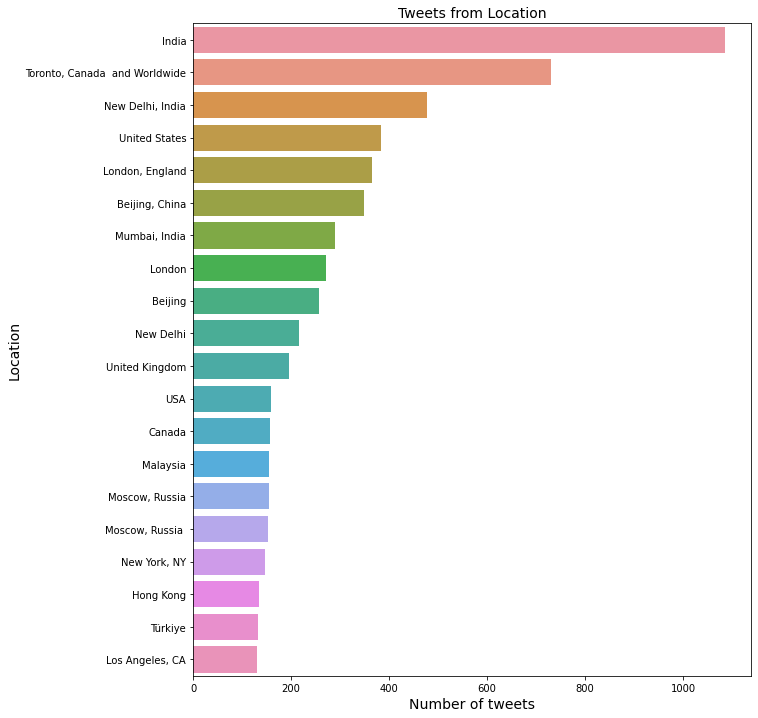

In [109]:
#user_location columns is very diverse
plt.figure(figsize=(10,12))
sns.barplot(df_tweety["user_location"].value_counts().values[0:20],
            df_tweety["user_location"].value_counts().index[0:20]);
plt.title("Tweets from Location",fontsize=14)
plt.xlabel("Number of tweets",fontsize=14)
plt.ylabel("Location",fontsize=14)
plt.show()

It proved at least possible to systematically access a tweets from the federal states of the US via often used state abbreviations in significant numbers in a way that roughly corresponds to the size of the respective states.

In [110]:
df_US = df_tweety.copy()

In [111]:
states_dict = {
            'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AS': 'American Samoa',
            'AZ': 'Arizona','CA': 'California','CO': 'Colorado','CT': 'Connecticut',
            'DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida','GA': 'Georgia',
            'GU': 'Guam','HI': 'Hawaii','IA': 'Iowa','ID': 'Idaho','IL': 'Illinois',
            'IN': 'Indiana','KS': 'Kansas','KY': 'Kentucky','LA': 'Louisiana',
            'MA': 'Massachusetts','MD': 'Maryland','ME': 'Maine','MI': 'Michigan',
            'MN': 'Minnesota','MO': 'Missouri','MP': 'Northern Mariana Islands',
            'MS': 'Mississippi','MT': 'Montana','NA': 'National','NC': 'North Carolina',
            'ND': 'North Dakota','NE': 'Nebraska','NH': 'New Hampshire','NJ': 'New Jersey',
            'NM': 'New Mexico','NV': 'Nevada','NY': 'New York','OH': 'Ohio','OK': 'Oklahoma',
            'OR': 'Oregon','PA': 'Pennsylvania','PR': 'Puerto Rico','RI': 'Rhode Island',
            'SC': 'South Carolina','SD': 'South Dakota','TN': 'Tennessee','TX': 'Texas',
            'UT': 'Utah','VA': 'Virginia','VI': 'Virgin Islands','VT': 'Vermont',
            'WA': 'Washington','WI': 'Wisconsin','WV': 'West Virginia','WY': 'Wyoming'
            }
states_dict_inv = {v: k for k, v in states_dict.items()}

# for US tweets extract state abbreviations for a new STATE column
# helper function to extract state origin of every tweet
def get_state(x):
    
    states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
              "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
              "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
              "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
              "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

    abbrev = x.split(',')[-1].lstrip().upper()
    if abbrev in states:
        return abbrev
    else:
        return 0


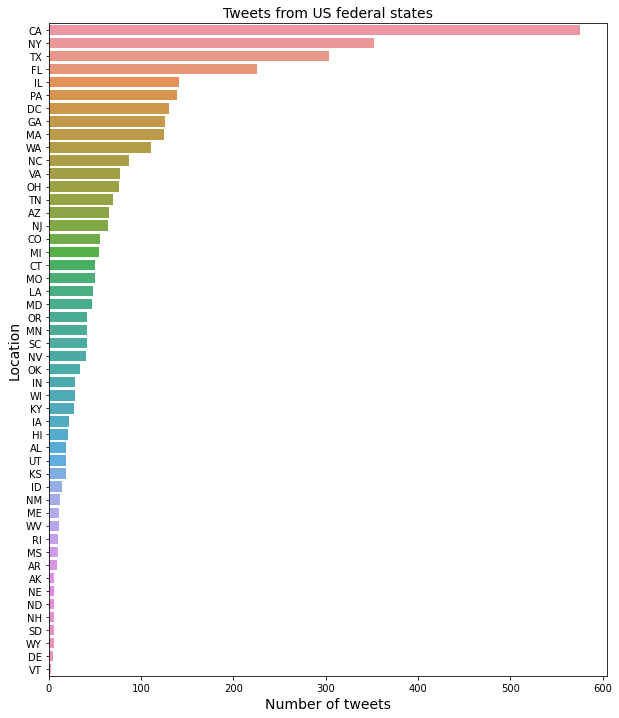

In [112]:
# create abreviated states column
df_US['us_state'] = df_US['user_location'].astype(str).apply(get_state)
df_US = df_US[df_US['us_state'] != 0]

plt.figure(figsize=(10,12))
sns.barplot(df_US.us_state.value_counts().values[0:50],
            df_US.us_state.value_counts().index[0:50]);
plt.title("Tweets from US federal states",fontsize=14)
plt.xlabel("Number of tweets",fontsize=14)
plt.ylabel("Location",fontsize=14)
plt.show()

In [113]:
df_US.groupby(['user_name'])['user_infl'].mean().sort_values(ascending=False)[:20]#/df_US.us_state.count_values

user_name
PETA                  542.0
surfspup              353.0
Dr. Yaacoub Hallak    311.0
News12LI              303.0
CGTN America          274.0
Freddie Roach         268.0
rachel palmer         256.0
Kimberly Blodgett     247.0
KVUE News             243.0
(HL)                  238.0
Jeana Mamer           237.0
Carolyn Adams         237.0
Kyle S 🏳️‍🌈 💜💙🏳️‍🌈    225.0
Lucia Fasano          222.0
opposablethumbs       216.5
Duane Eklof           215.0
Linda Boyd-Dickson    212.0
Sophie                209.0
Nik                   208.0
t😷 🐢🌵🌊(@🏠)            204.0
Name: user_infl, dtype: float64

The most influential users from the US seem rather unknown. That does not speak for a balanced representation in the dataset.

## 2.3. Most popular tweets

### Popularity measure: number of *retweets*

In [114]:
pd.set_option('display.max_colwidth', -1)

In [115]:
df_stat1 = df_tweety.sort_values(by='retweets', ascending=False)
print('Retweets (mean):', round(df_stat1['retweets'].mean(),2), '\n')

print('10 most responded tweets:')
df_stat1 = df_stat1[['user_name','text']].iloc[:10]
df_stat1

Retweets (mean): 3.11 

10 most responded tweets:


,user_name,text
17103,Dr. S. Jaishankar,"Got my jab. For the curious, it was #Covaxin. \n\nFelt secure, will travel safely. https://t.co/8PL7PZMEsf"
7117,Robert F. Kennedy Jr,"New research published in Microbiology &amp; Infectious Diseases, immunologist J. Bart Classen warns #mRNA technology u… https://t.co/OWUTf5ShHO"
24248,Megh Updates 🚨,"#Covaxin 🇮🇳 , made by Hyderabad-based Bharat Biotech International Limited, has been declared ""Safe, Immunogenic wi… https://t.co/FAUOEHJmAw"
38451,Sputnik V,A batch of fake Sputnik V vaccines was confiscated in Mexico. See this comparison of the genuine #SputnikV with a f… https://t.co/J7PxMq2e1M
17528,Megh Updates 🚨,Prime Minister Narendra Modi choose early morning time to take #covaxin . No traffic was stopped . Traveled normall… https://t.co/udxAqk9xEC
23695,Afshin Rattansi,This is not a queue for a Covid vaccine\nThis is a queue at a food bank today in the UK.\n#coronavirus #oxfordvaccine… https://t.co/rGqg14FT9t
20906,Megh Updates 🚨,#BREAKING : Bharat Biotech says its #Covaxin shows interim clinical efficacy of 81% in Phase 3 results
20516,Manoj Rawat,It is tough when have to play the sauve Amrikan doctor but ur desi Lahore genes start acting up #Covaxin https://t.co/ZUygPW4WGd
13089,Aditya Raj Kaul,AIIMS nurse who gave the #Covaxin jab to Prime Minister @narendramodi speaks to the national broadcaster DD News ab… https://t.co/ivPj4KGiyE
21507,Minhaz Merchant,"The Opposition campaign to denigrate #Covaxin is disgraceful. So is the refusal by a coterie of senior editors, col… https://t.co/yN6M1BxvCn"


### Popularity measure: number of *likes*

In [116]:
df_stat2 = df_tweety.sort_values(by='favorites', ascending=False)
print('Likes (mean):', round(df_stat2['favorites'].mean(),2), '\n')
print('10 most liked tweets:')
df_stat2[['user_name', 'text']].iloc[:10]

Likes (mean): 13.76 

10 most liked tweets:


,user_name,text
17103,Dr. S. Jaishankar,"Got my jab. For the curious, it was #Covaxin. \n\nFelt secure, will travel safely. https://t.co/8PL7PZMEsf"
24248,Megh Updates 🚨,"#Covaxin 🇮🇳 , made by Hyderabad-based Bharat Biotech International Limited, has been declared ""Safe, Immunogenic wi… https://t.co/FAUOEHJmAw"
30783,Nagarjuna Akkineni,Got my #covaxin jab yesterday .. absolutely no down time👍😊I urge whoever is eligible to take the vaccine!!\nYou can… https://t.co/17Avulfc9n
17528,Megh Updates 🚨,Prime Minister Narendra Modi choose early morning time to take #covaxin . No traffic was stopped . Traveled normall… https://t.co/udxAqk9xEC
34974,The Hoarse Whisperer,That. Just. Happened.\n\n#Moderna #CovidVaccine #ThankYouScience #ImNotGonnaCryInCVS #OkIMight #DontJudge #ItHitsYa… https://t.co/cg7yj6JrPM
20906,Megh Updates 🚨,#BREAKING : Bharat Biotech says its #Covaxin shows interim clinical efficacy of 81% in Phase 3 results
13089,Aditya Raj Kaul,AIIMS nurse who gave the #Covaxin jab to Prime Minister @narendramodi speaks to the national broadcaster DD News ab… https://t.co/ivPj4KGiyE
20905,Prof Shamika Ravi,Phase 3 Results of #COVAXIN - announced by @BharatBiotech : Demonstrates Interim Clinical Efficacy of 81%
27519,Sammy Hagar,"I dislike shots as much as anyone. But I want to get back to playing live concerts, traveling the world without put… https://t.co/vzLnGk7BzG"
14309,Ravi Ranjan,Hon’ble PM @narendramodi We are all watching how you are making “Make in India” strong. You are strengthening the… https://t.co/ONYg0wjrni


The categories partly overlap. Below, we will look at the sentiments of the sentiments of popular and influential tweets. Covaxin and India seems to play a prominant role. This underlines the assumption that tweets from India are well represented in this data set (see location)

Moreover, inspecting the tweets shows that those which exceed a lenght of 140 characters are cut off. Further inspection inductively confims a cut-off-pattern of '...', followed by an empty space and a link to the tweet. A separate investigation is carried out in notebook ??? on a subset of data that do not show this pattern and so can be assumed to be complete. The predominent question is whether the two datasets exhibit similar distribution of sentiments.

In [117]:
df_tweety['text'].str.len()

0        97 
1        140
2        140
3        140
4        135
        ... 
38515    140
38516    140
38517    140
38518    128
38519    140
Name: text, Length: 38520, dtype: int64

# 3. Exploiting the feature 'text' for information on frequent words, hashtags, handles

## 3.1 Most frequent words

In [118]:
#remove stopwords
stopwords = nltk.corpus.stopwords.words('english') + ['i', 'I', 'The', 'the', 'got', '-', 'one']
df_tweety.text = df_tweety.text.apply(lambda x:' '.join([word for word in x.split() if word not in stopwords]))

In [119]:
tweet_words = []
for line in list(df_tweety['text']):
    words = line.split()
    for word in words:
        tweet_words.append(word.lower())
tweet_words=pd.Series(np.array(tweet_words))
frequency_ranking_words = tweet_words.value_counts()[:15].rename_axis('words_text_freq').reset_index(name='count')
frequency_ranking_words

,words_text_freq,count
0,vaccine,8513
1,#moderna,6181
2,first,4147
3,#covaxin,4115
4,#covid19,4070
5,#pfizerbiontech,3492
6,dose,3169
7,#vaccine,3064
8,#sputnikv,2855
9,covid-19,2052


In line with these results, getting a first vaccine dose ('get', 'first', 'dose' are the most likely non-vaccine concepts that surface in tweets) can be confirmed to be a very frequent tweet occasion reading the tweets.

We can use this list to enrich the stopword-list for later tasks of text cleaning.

### 3.2 Most frequently mentioned twitter accounts @

In [120]:
twitter_accounts = []
for line in df_tweety['text']:
    words = line.split()
    for word in words:
        if re.search('@[^\s]+', word):
            twitter_accounts.append(word)
mentioned_accounts=pd.Series(np.array(twitter_accounts))
accounts = mentioned_accounts.value_counts()[:20].rename_axis('accounts').reset_index(name='count')

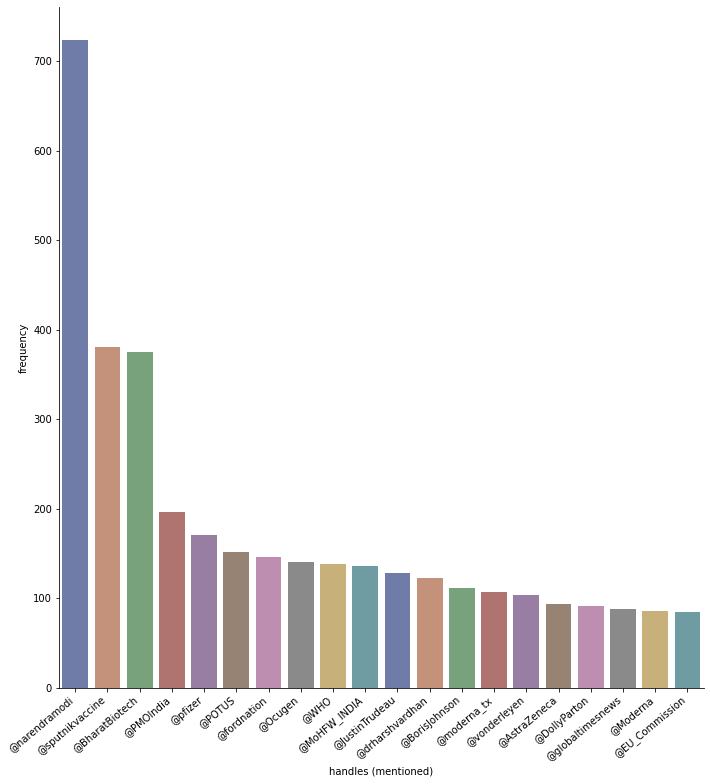

In [121]:
#f, ax = plt.subplots(figsize=(7, 5))

g = sns.catplot(
    data=accounts, kind="bar",
    x="accounts", y="count",# hue="sex",
    ci="sd", palette="dark", height=10, alpha=.6
)
#g.despine(left=True)
g.set_axis_labels("handles (mentioned)", "frequency")
g.set_xticklabels(rotation=40, ha="right")
#g.legend.set_title("")

Politicians, political institutions and vaccine producers are the most requently mentioned twitter accounts. This just underlines that vaccination is a political and international issue beyond a medical one.

Once more, the ranking supports the assumption of a strong Indian voice in the dataset.


### 3.3 Most frequent hashtags

In [122]:
tweet_words_hasht = []
for line in df_tweety['text']:
    words = line.split()
    for word in words:
        if re.search('#[^\s]+', word):
            tweet_words_hasht.append(word)
tweet_words_hasht=pd.Series(np.array(tweet_words_hasht))
frequency_hashtags = tweet_words_hasht.value_counts()[:20].rename_axis('text_hasht_freq').reset_index(name='count')
#frequency_hashtags

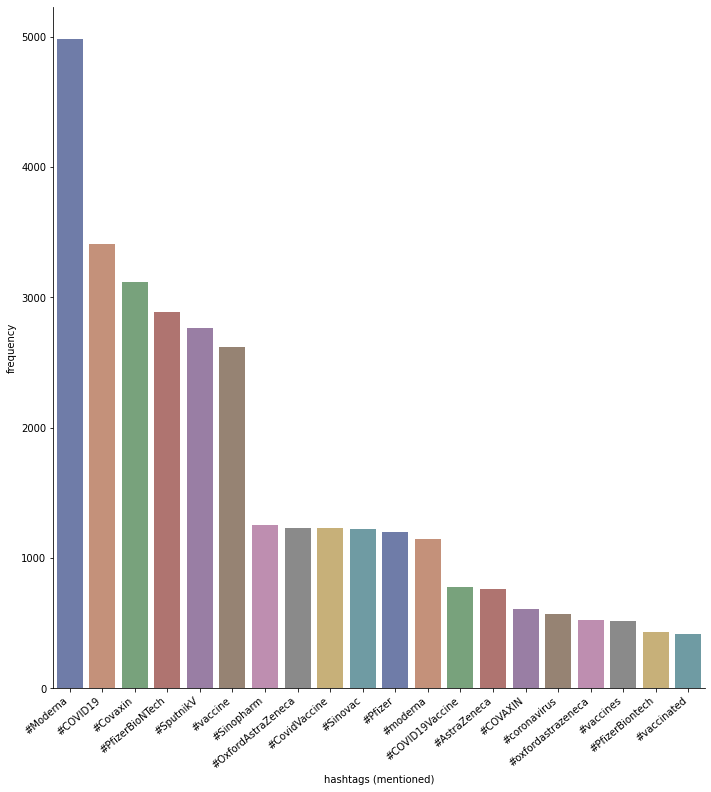

In [123]:
g = sns.catplot(
    data=frequency_hashtags, kind="bar",
    x="text_hasht_freq", y="count",# hue="sex",
    ci="sd", palette="dark", height=10, alpha=.6
)
#g.despine(left=True)
g.set_axis_labels("hashtags (mentioned)", "frequency")
g.set_xticklabels(rotation=40, ha="right")
#g.legend.set_title("")

# 4. Exploiting the feature 'hashtags' for information on frequent words, hashtags

## 4.1 Most frequent hashtags

Lists in 'hashtags' are stored as strings

In [125]:
df_tweety['hashtags'] = df_tweety['hashtags'].apply(eval)

TypeError: eval() arg 1 must be a string, bytes or code object

In [126]:
df_tweety['hashtags'] = df_tweety['hashtags'].fillna('[]')

def to_1D(Series):
    return pd.Series([x.lower() for lst in Series for x in lst])

hasht_freq = to_1D(df_tweety['hashtags']).value_counts()[:30].rename_axis('hasht_freq').reset_index(name='count')

In [127]:
df_tweety['hashtags'] = df_tweety['hashtags'].apply(eval)

In [128]:
df_tweety['hashtags'] = df_tweety['hashtags'].fillna('[]')

def to_1D(Series):
    return pd.Series([x.lower() for lst in Series for x in lst])

hasht_freq = to_1D(df_tweety['hashtags']).value_counts()[:20].rename_axis('hasht_freq').reset_index(name='count')
#print(hasht_freq.hasht_freq.tolist())

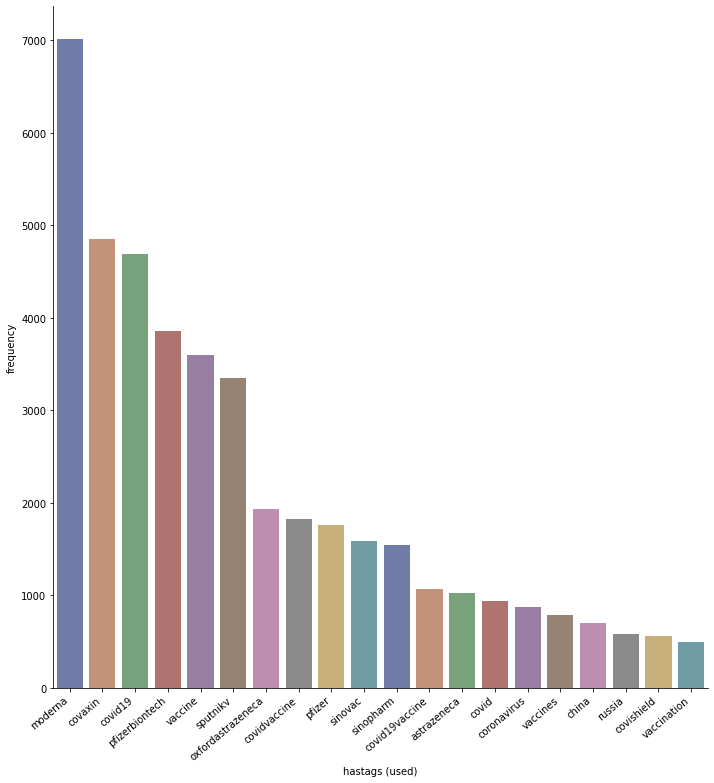

In [129]:
g = sns.catplot(
    data=hasht_freq, kind="bar",
    x="hasht_freq", y="count",# hue="sex",
    ci="sd", palette="dark", height=10, alpha=.6
)
#g.despine(left=True)
g.set_axis_labels("hastags (used)", "frequency")
g.set_xticklabels(rotation=40, ha="right")
#g.legend.set_title("")

In contrast, particular vaccines or the vaccination topic play the dominant role in the category of used hashtags.

### 4.2 Frequent countries in 'hashtag'
We can however spot that countries get mentioned in used hashtags. China, Russia, India and the EU trend at the top. This might be relevant to compare with vaccination progress in these countries.

In [130]:
df_tweety['hashtags'] = df_tweety['hashtags'].fillna('[]')

def to_1D(Series):
    return pd.Series([x.upper() for lst in Series for x in lst if x.lower() in ['china', 'eu', 'india', 'usa', 'scotland', 'england', 'russia', 'uk', 'italy', 'germany', 'france', 'america', 'brazil', 'japan', 'canada', 'afghanistan', 'china']])

to_1D(df_tweety['hashtags']).value_counts()[:30].rename_axis('hasht_country_freq').reset_index(name='count')

,hasht_country_freq,count
0,CHINA,699
1,RUSSIA,580
2,EU,392
3,INDIA,368
4,UK,109
5,CANADA,103
6,ITALY,101
7,USA,82
8,BRAZIL,70
9,GERMANY,65


## 4.3 Selection (vaccines, vaccination) from ranked hanstags (top 30) added to dataframe for further analysis

Idea: create df with vaccines in hashtags as columns and append it to df_tweety

In [131]:
def to_1D(Series):
    return pd.Series([x.lower() for lst in Series for x in lst])

unique_hasht = to_1D(df_tweety['hashtags']).value_counts()[:30]

In [132]:
def boolean_df(item_lists, unique_items):

    # Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask that returns a True-False list of whether a tag is in a taglist
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [133]:
hasht_bool = boolean_df(df_tweety['hashtags'], unique_hasht.keys())
#Drop non-vaccine related columns
hasht_bool.drop(['covid19', 'covid', 'china', 'russia', 'eu', 'india', 'covid_19', 'coronavirus'], axis=1)

,moderna,covaxin,pfizerbiontech,vaccine,sputnikv,oxfordastrazeneca,covidvaccine,pfizer,sinovac,sinopharm,...,vaccines,covishield,vaccination,vaccinated,pfizervaccine,bharatbiotech,covidvaccination,covid19vaccination,coronavaccine,mrna
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38515,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38516,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38517,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38518,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [134]:
df_tweety_vaccs = pd.concat([df_tweety, hasht_bool], axis=1)
df_tweety_vaccs = df_tweety_vaccs.drop(['user_followers', 'user_friends', 'user_favourites', 'hashtags', 'user_verified'], axis=1)

In [135]:
df_tweety_vaccs.to_csv('Data/tweety_vaccs.csv')

# 5. Sentiment analysis

## 5.1 Sentiment analysis with VADER

### Cleaning, feature engineering

In [136]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['moderna', 'covaxin', 'covid19', 'pfizerbiontech', 'vaccine', 'sputnikv', 'oxfordastrazeneca', 'covidvaccine', 'pfizer', 'sinovac', 'sinopharm', 'covid19vaccine', 'astrazeneca', 'covid', 'coronavirus', 'vaccines', 'china', 'russia', 'covishield', 'vaccination', 'vaccinated', 'pfizervaccine', 'eu', 'india', 'covid_19', 'bharatbiotech', 'covidvaccination', 'covid19vaccination', 'coronavaccine', 'mrna', 'johnsonandjohnson', 'getvaccinated', 'biontech', 'narendramodi', 'hongkong', 'pakistan', 'covidvacccine', 'pmmodi', 'modernavaccine', 'ocgn', 'iran', 'nhs', 'coronavirusvaccine', 'ocugen', 'breaking', 'covidvaccines', 'aiims', 'russian', 'pfizercovidvaccine', 'vaccineswork', 'news', 'putin', 'uk', 'who', 'us', 'canada', 'italy', 'covidー19', 'covid19vaccines', 'israel', 'corona', 'hungary', 'zimbabwe', 'pandemic', 'covax', 'oxfordvaccine', 'usa', 'health', 'modi', 'vaccine', 'first', 'covid', 'dose', 'today', '19', 'vaccines', 'amp', 'shot', 'doses']
#stopwords.extend(newStopWords)

Most frequent words and topic words are added to stopwords.

In [137]:
def clean_tweet_vader(x):
    x = str(x)
    x = x.lower()

    #remove twitter handlers
    x = re.sub('@[^\s]+','',x)
    #remove hashtags
    x = re.sub('#[^\s]+','',x)
    #remove URLs
    x = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', x)
    #remove punctuation
    #x = x.replace('[^\w\s]','')
    #remove single characters
    x = re.sub(r'\s+[a-zA-Z0-9]\s+', '', x)
    #substitute multiple spaces with single space
    x = re.sub(r'\s+', ' ', x, flags=re.I)
    #remove linebreaks
    x = re.sub('\n', '', x)
    #remove special characters
    x = ' '.join(re.findall(r'\w+', x))
    #stemming
    #x = ' '.join([stemmer.stem(word) for word in x.split() ])
    #lemmatizing
    x = ' '.join([lemmatizer.lemmatize(word) for word in x.split() ])
    #removing stop words
    x = ' '.join([word for word in x.split() if word not in stopwords])
    #removing numbers
    x = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", x)
    #x = x.split()

    return x

In [138]:
df_tweety.text = df_tweety.text.apply(lambda x: clean_tweet_vader(x))

In [139]:
df_tweety.text

0        folk said daikon paste could treat cytokine storm                                  
1        world wrong side history year hopefully biggest vaccination effort ev              
2        russian vaccine created last 4 year                                                
3        fact immutable senator even ethically sturdy enough acknowledge born               
4        explain need vaccine                                                               
                 ...                                                                        
38515    sputnikreview emergency use authorization india marketed india drl whic            
38516    planned start mass vaccination uzbekistan march                                    
38517    austrian chancellor sebastian kurz concerning vaccine strongly insist relevant eu  
38518    norwegian politician calling cut vaccine deal amid record high infection           
38519    emerges global manufacturing hub covid vaccine hyderabad base

In [140]:
#!pip install vaderSentiment

In [141]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [142]:
analyser = SentimentIntensityAnalyzer()

scores=[]
for i in range(len(df_tweety['text'])):
    
    score = analyser.polarity_scores(df_tweety['text'][i])
    score=score['compound']
    scores.append(score)
    
sentiment=[]
for i in scores:
    if i>=0.05:
        sentiment.append('positive')
    elif i<=(-0.05):
        sentiment.append('negative')
    else:
        sentiment.append('neutral')

Add VADER qualitative sentiment values to data frames:

In [143]:
df_tweety['sentiment']=pd.Series(np.array(sentiment))
df_tweety_vaccs['sentiment']=pd.Series(np.array(sentiment))

Create corresponding data frames for the most influential 1% of users:

In [188]:
df_tweety_infl = df_tweety[df_tweety['user_infl']>236]
df_tweety_vaccs_infl = df_tweety_vaccs[df_tweety_vaccs['user_infl']>236]

### Basic statistics

Based on VADER asssignments of sentiment polarity.

<AxesSubplot:xlabel='index', ylabel='sentiment'>

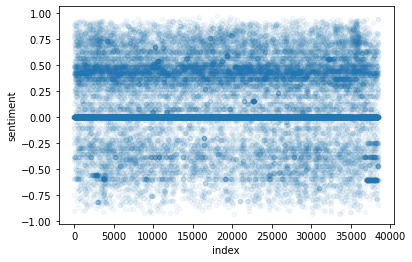

In [189]:
scores = pd.Series(np.array(scores))
df_scores = pd.DataFrame(scores).reset_index()
df_scores2 = df_scores.rename(columns={0: 'sentiment'})

df_scores2.plot.scatter(x='index', y='sentiment', alpha=0.05)

Proportions of neutral, positive and negative polarity scores:

In [190]:
df_tweety.sentiment.value_counts()/len(df_tweety)

neutral     0.518094
positive    0.381049
negative    0.100857
Name: sentiment, dtype: float64

Count of sentiments per day

In [191]:
daily_sent = df_tweety.groupby(['day', 'sentiment'])['index'].count()
df_daily_sent = pd.DataFrame(daily_sent)#.reset_index()#.rename(columns={"index": "count"})

In [192]:
df_tweety_neg = df_tweety[df_tweety['sentiment']=='negative']
df_tweety_pos = df_tweety[df_tweety['sentiment']=='positive']
df_tweety_neg.to_csv('Data/tweety_topic.csv')
df_tweety_neg.to_csv('Data/tweety_topic2.csv')

## 5.2 Sentiment analysis (BLOB)

### Cleaning, feature engineering for TextBlob

In [193]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')

In [194]:
def clean_tweet_blob(x):
    ''' Pre process and convert texts to a list of words 
    method inspired by method from eliorc github repo: https://github.com/eliorc/Medium/blob/master/MaLSTM.ipynb'''
    x = str(x)
    x = x.lower()

    #remove twitter handlers
    x = re.sub('@[^\s]+','',x)
    #remove hashtags
    x = re.sub('#[^\s]+','',x)
    #remove URLs
    x = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', x)
    #remove punctuation
    x = x.replace('[^\w\s]','')
    #remove single characters
    x = re.sub(r'\s+[a-zA-Z0-9]\s+', '', x)
    #substitute multiple spaces with single space
    x = re.sub(r'\s+', ' ', x, flags=re.I)
    #remove linebreaks
    x = re.sub('\n', '', x)
    #remove special characters
    x = ' '.join(re.findall(r'\w+', x))
    #stemming
    x = ' '.join([stemmer.stem(word) for word in x.split() ])
    #lemmatizing
    x = ' '.join([lemmatizer.lemmatize(word) for word in x.split() ])
    #removing stop words
    x = ' '.join([word for word in x.split() if word not in stopwords])
    #removing numbers
    x = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", x)
    #x = x.split()

    return x

In [195]:
df_tweety_tb = df_tweety
df_tweety_tb_vaccs = df_tweety_vaccs
df_tweety_tb.text.apply(lambda x: clean_tweet_blob(x))

0        folk said daikon past could treat cytokin storm                            
1        world wrong side histori year hope biggest vaccin effort ev                
2        russian vaccin creat lastyear                                              
3        fact immut senat even ethic sturdi enough acknowledg born                  
4        explain need vaccin                                                        
                ...                                                                 
38515    sputnikreview emerg use author india market india drl whic                 
38516    plan start mass vaccin uzbekistan march                                    
38517    austrian chancellor sebastian kurz concern vaccin strongli insist relev eu 
38518    norwegian politician call cut vaccin deal amid record high infect          
38519    emerg global manufactur hub covid vaccin hyderabad base gland pharma suppli
Name: text, Length: 38520, dtype: object

In [196]:
#install TextBlob, a python library for processing textual data
#!pip install textblob

#import TextBlob
from textblob import TextBlob

#from pylab import rcParams
#rcParams['figure.figsize'] = 12, 8

In [197]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [198]:
df_tweety_tb_vaccs['subjectivity'] = df_tweety_tb_vaccs['text'].apply(getTextSubjectivity)
df_tweety_tb_vaccs['sentiment'] = df_tweety_tb_vaccs['text'].apply(getTextPolarity)

df_tweety_tb['subjectivity'] = df_tweety_tb['text'].apply(getTextSubjectivity)
df_tweety_tb['sentiment'] = df_tweety_tb['text'].apply(getTextPolarity)

In [199]:
# negative, nautral, positive analysis
def getTextAnalysis(tweet):
    if tweet >= 0.05:
        return "positive"
    elif tweet <= (-0.05):
        return "negative"
    else:
        return "neutral"

df_tweety_tb_vaccs['sentiment'] = df_tweety_tb_vaccs['sentiment'].apply(getTextAnalysis)
df_tweety_tb['sentiment'] = df_tweety_tb['sentiment'].apply(getTextAnalysis)

neutral     0.518094
positive    0.381049
negative    0.100857
Name: sentiment, dtype: float64

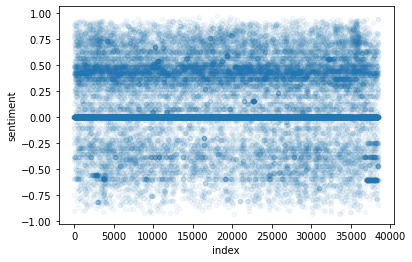

In [200]:
scores_tb = df_tweety_tb['sentiment'].tolist()#pd.Series(np.array(scores))

df_scores_tb = pd.DataFrame(scores).reset_index()
df_scores_tb = df_scores.rename(columns={0: 'sentiment'})

df_scores_tb.plot.scatter(x='index', y='sentiment', alpha=0.05)

df_tweety_tb.sentiment.value_counts()/len(df_tweety)

VADER polarity scores do not seem to be correlated with user influence.

# 6. Sentiment visualization

## 6.1 Tweets, user status verified vs. non-verified

Looking at the influential users status (>236), neutrality is more more common on average.

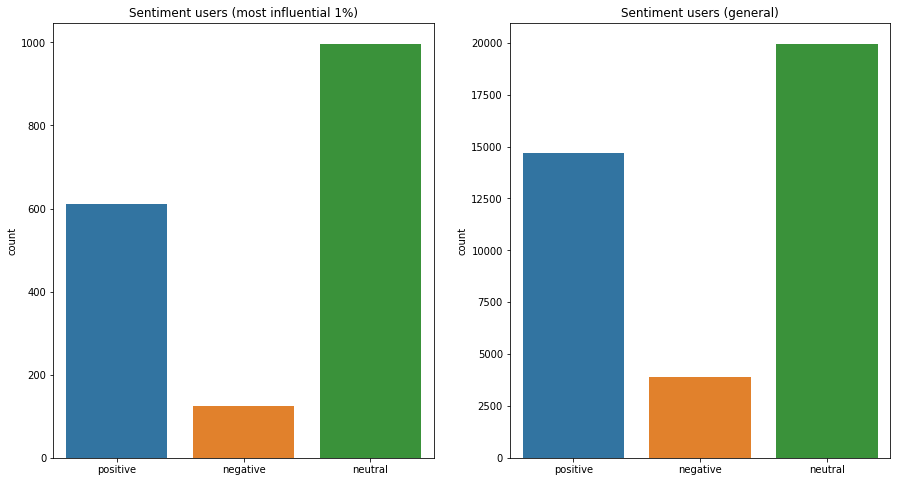

In [203]:
order_list = ['positive', 'negative', 'neutral']
plt.figure(figsize = (15, 8))
plt.subplot(1, 2, 1)
ax = sns.countplot(x='sentiment',data=df_tweety_infl, order = order_list)
ax.set(xlabel='', ylabel='count', title='Sentiment users (most influential 1%)')

plt.subplot(1, 2, 2)
ax = sns.countplot(x='sentiment',data=df_tweety, order = order_list)
ax.set(xlabel='', ylabel='count', title='Sentiment users (general)')
plt.show()

Expectedly, user influence and sentiment are linearly independent.

In [204]:
df_tweety['scores'] = scores

import statsmodels.formula.api as smf
smf.ols(formula='user_infl ~ C(sentiment)', data=df_tweety).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              user_infl   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     11.18
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           1.40e-05
Time:                        18:49:26   Log-Likelihood:            -2.5010e+05
No. Observations:               38520   AIC:                         5.002e+05
Df Residuals:                   38517   BIC:                         5.002e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   59.9349      2.564     23.377      0.000      54.910      64.960
C(sentiment)[T.neutral]     13.0152      2.802      4.645      0.000       7.523      18.508
C(sentiment)[T.positive]     9.4022      2.883      3.261      0.001       3.751      15.053
==============================================================================
Omnibus:                    48766.030   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6641014.541
Skew:                           7.166   Prob(JB):                         0.00
Kurtosis:                      65.708   Cond. No.                         6.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 6.2 Sentiments relative to vaccines (extracted from most frequent hashtags)

To track and measure the opinion towards specific vaccines, we evaluate the sentiment of tweets which use a specific vaccine-name as a hashtag and compare them with those that refer to the topic of vaccination in general. If the hashtag mentions a specific vaccine, the likelihood is higher that the sentiment of the tweet has the vaccine as its object of evaluation.

The type names are taken from the set of the most frequently mentioned hashtags.

In [205]:
#Create subframes for plotting the sentiments relative to specific vaccines
df_moderna = df_tweety_vaccs[(df_tweety_vaccs['moderna']==True)]
df_moderna1 = df_moderna[['sentiment']]

df_covaxin = df_tweety_vaccs[(df_tweety_vaccs['covaxin']==True)
                            | (df_tweety_vaccs['bharatbiotech']==True)]
df_covaxin1 = df_covaxin[['sentiment']]

df_vacc = df_tweety_vaccs[(df_tweety_vaccs['vaccine']==True) | 
                          (df_tweety_vaccs['vaccinated']==True) |
                          (df_tweety_vaccs['vaccines']==True) |
                          (df_tweety_vaccs['covidvaccination']==True)|
                          (df_tweety_vaccs['coronavaccine']==True)|
                          (df_tweety_vaccs['covid19vaccination']==True)]
df_vacc1 = df_vacc['sentiment']

df_sinovac = df_tweety_vaccs[(df_tweety_vaccs['sinovac']==True)]
df_sinovac1 = df_sinovac[['sinovac', 'sentiment']]

df_sinopharm = df_tweety_vaccs[(df_tweety_vaccs['sinopharm']==True)]
df_sinopharm1 = df_sinopharm[['sinopharm', 'sentiment']]

df_biontech = df_tweety_vaccs[(df_tweety_vaccs['pfizerbiontech']==True)|
                              (df_tweety_vaccs['pfizer']==True)|
                              (df_tweety_vaccs['pfizervaccine']==True)]
df_biontech1 = df_biontech[['sentiment']]

df_astrazeneca = df_tweety_vaccs[(df_tweety_vaccs['astrazeneca']==True)|
                                (df_tweety_vaccs['oxfordastrazeneca']==True)]
df_astrazeneca1 = df_astrazeneca[['sentiment']]

df_sputnik = df_tweety_vaccs[(df_tweety_vaccs['sputnikv']==True)]
df_sputnik1 = df_sputnik[['sputnikv', 'sentiment']]

df_mrna = df_tweety_vaccs[(df_tweety_vaccs['mrna']==True)]
df_mrna1 = df_mrna[['mrna', 'sentiment']]

[Text(0.5, 0, ''), Text(0, 0.5, 'count'), Text(0.5, 1.0, 'mRNA')]

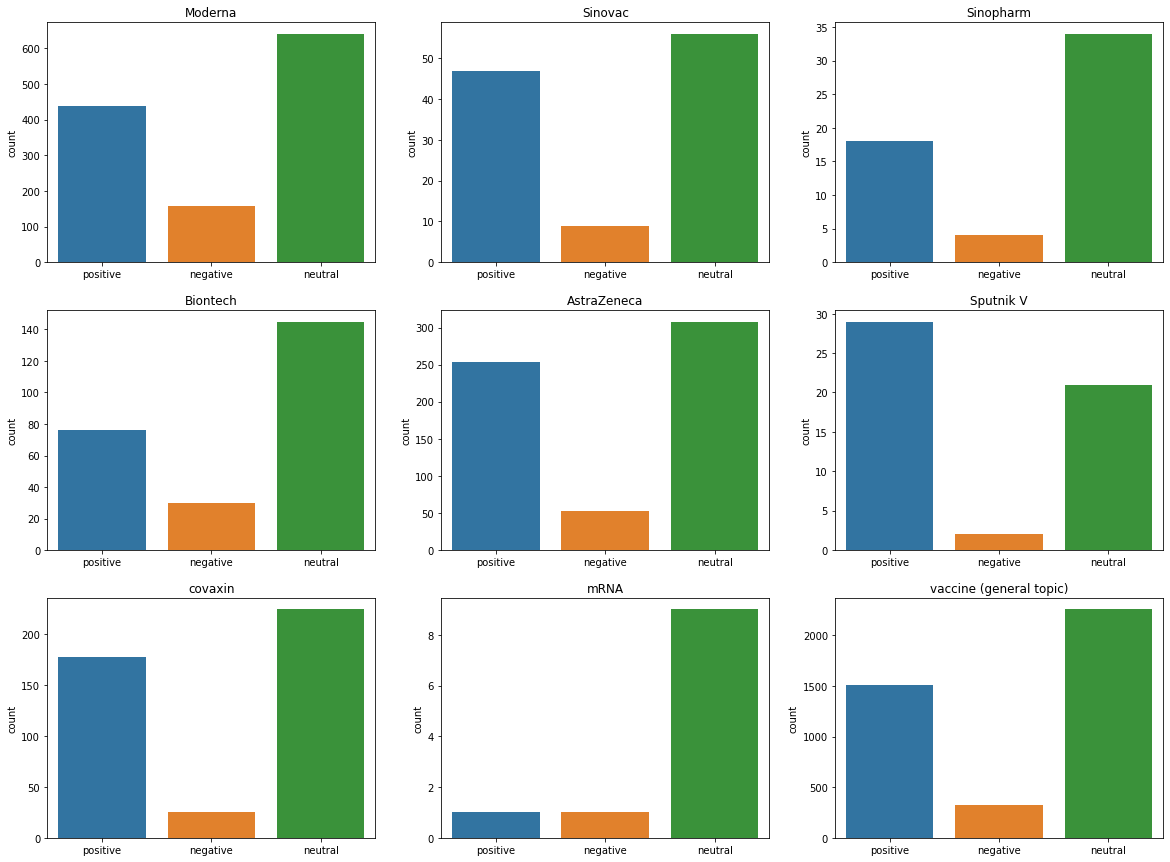

In [206]:
order_list = ['positive', 'negative', 'neutral']

plt.figure(figsize = (20, 15))

plt.subplot(3, 3, 1)
ax = sns.countplot(x='sentiment',data=df_moderna1, order = order_list)
ax.set(xlabel='', ylabel='count', title='Moderna')
plt.subplot(3, 3, 2)
ax = sns.countplot(x='sentiment',data=df_sinovac1, order = order_list)
ax.set(xlabel='', ylabel='count', title='Sinovac')

plt.subplot(3, 3, 3)
ax = sns.countplot(x='sentiment',data=df_sinopharm1, order = order_list)
ax.set(xlabel='', ylabel='count', title='Sinopharm')
plt.subplot(3, 3, 4)
ax = sns.countplot(x='sentiment',data=df_biontech1, order = order_list)
ax.set(xlabel='', ylabel='count', title='Biontech')
plt.subplot(3, 3, 5)
ax = sns.countplot(x='sentiment',data=df_astrazeneca1, order = order_list)
ax.set(xlabel='', ylabel='count', title='AstraZeneca')

plt.subplot(3, 3, 6)
ax = sns.countplot(x='sentiment',data=df_sputnik1, order = order_list)
ax.set(xlabel='', ylabel='count', title='Sputnik V')

plt.subplot(3, 3, 7)
ax = sns.countplot(x='sentiment',data=df_covaxin, order = order_list)
ax.set(xlabel='', ylabel='count', title='covaxin')

plt.subplot(3, 3, 9)
ax = sns.countplot(x='sentiment',data=df_vacc, order = order_list)
ax.set(xlabel='', ylabel='count', title='vaccine (general topic)')

plt.subplot(3, 3, 8)
ax = sns.countplot(x='sentiment',data=df_mrna, order = order_list)
ax.set(xlabel='', ylabel='count', title='mRNA')


## 6.3 Sentiments by influence

### The most influential sources

News sources from India and China and Indian individuals make up the larger part of the top influential users. The sentiments conveyed by their messages are of particular interest. The ranking is almost identical with to the follower ranking.

<AxesSubplot:xlabel='user_followers', ylabel='user_name'>

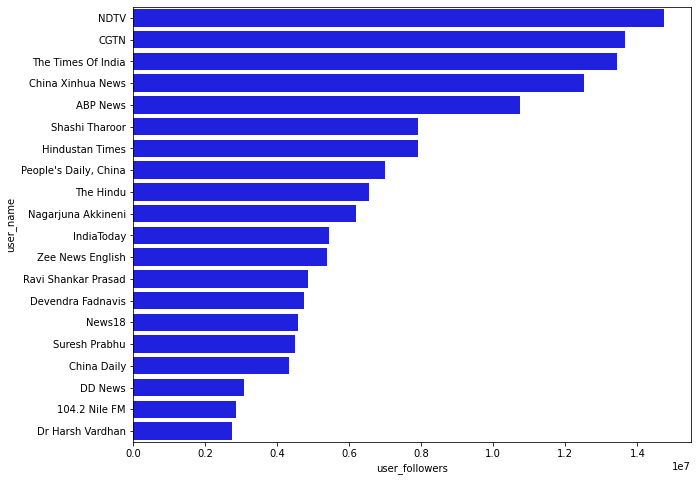

In [207]:
twinfluence1 = df_tweety.sort_values("user_infl", ascending=False).reset_index(drop=True)
twinfluence1 = twinfluence1.drop_duplicates(subset=['user_name'], keep='last')
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='user_followers', y='user_name', orient='h', color='b', data=twinfluence1[['user_name', 'user_followers']][:20])

In [208]:
#Create subframes for plotting the sentiments relative to specific vaccines
df_modernA = df_tweety_vaccs_infl[(df_tweety_vaccs_infl['moderna']==True)]
df_modernA1 = df_moderna[['moderna', 'sentiment']]

df_covaxiN = df_tweety_vaccs[(df_tweety_vaccs['covaxin']==True)
                            | (df_tweety_vaccs['bharatbiotech']==True)]
df_covaxiN1 = df_covaxin[['sentiment']]

df_vacC = df_tweety_vaccs_infl[(df_tweety_vaccs_infl['vaccine']==True) | 
                          (df_tweety_vaccs_infl['vaccinated']==True) |
                          (df_tweety_vaccs_infl['vaccines']==True) |
                          (df_tweety_vaccs_infl['covidvaccination']==True)|
                          (df_tweety_vaccs_infl['coronavaccine']==True)|
                          (df_tweety_vaccs_infl['covid19vaccination']==True)]
df_vacC1 = df_vacc['sentiment']

df_sinovaC = df_tweety_vaccs_infl[(df_tweety_vaccs_infl['sinovac']==True)]
df_sinovaC1 = df_sinovac[['sinovac', 'sentiment']]

df_sinopharM = df_tweety_vaccs_infl[(df_tweety_vaccs_infl['sinopharm']==True)]
df_sinopharM1 = df_sinopharm[['sinopharm', 'sentiment']]

df_biontecH = df_tweety_vaccs_infl[(df_tweety_vaccs_infl['pfizerbiontech']==True)|
                              (df_tweety_vaccs_infl['pfizer']==True)|
                              (df_tweety_vaccs_infl['pfizervaccine']==True)]
df_biontecH1 = df_biontech[['sentiment']]

df_astrazenecA = df_tweety_vaccs_infl[(df_tweety_vaccs_infl['astrazeneca']==True)|
                                (df_tweety_vaccs_infl['oxfordastrazeneca']==True)]
df_astrazenecA1 = df_astrazeneca[['sentiment']]

df_sputniK = df_tweety_vaccs_infl[(df_tweety_vaccs_infl['sputnikv']==True)]
df_sputniK1 = df_sputnik[['sputnikv', 'sentiment']]

df_mrnA = df_tweety_vaccs_infl[(df_tweety_vaccs_infl['mrna']==True)]
df_mrnA1 = df_mrna[['mrna', 'sentiment']]

### Sentiment by news source

[Text(0.5, 0, ''), Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Russia Today')]

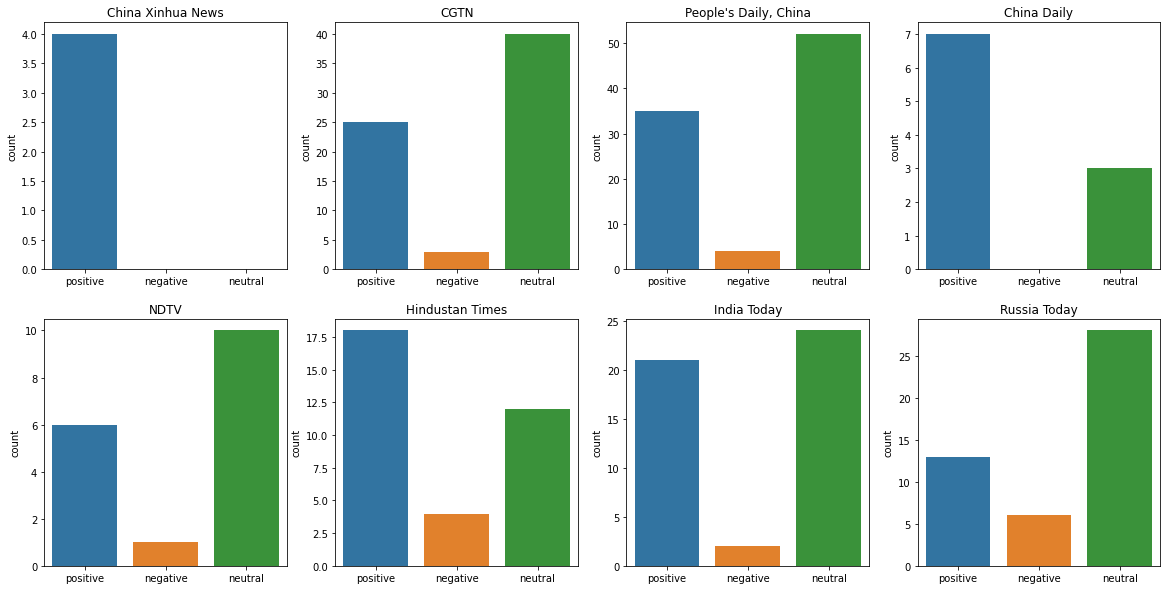

In [209]:
NDTV = df_tweety[df_tweety['user_name']=='NDTV']
CGTN = df_tweety[df_tweety['user_name']=='CGTN']
TTOI = df_tweety[df_tweety['user_name']=='The Times Of India']
CXN = df_tweety[df_tweety['user_name']=='China Xinhua News']
ABP = df_tweety[df_tweety['user_name']=='ABP News']
HT = df_tweety[df_tweety['user_name']=='Hindustan Times']
PDC = df_tweety[df_tweety['user_name']=='People\'s Daily, China']
TH = df_tweety[df_tweety['user_name']=='The Hindu']
IT = df_tweety[df_tweety['user_name']=='IndiaToday']
ZNE = df_tweety[df_tweety['user_name']=='Zee News English']
N18 = df_tweety[df_tweety['user_name']=='News18']
CD = df_tweety[df_tweety['user_name']=='China Daily']
ET = df_tweety[df_tweety['user_name']=='Economic Times']
DDN = df_tweety[df_tweety['user_name']=='DD News']
RT = df_tweety[df_tweety['user_name']=='RT']



order_list = ['positive', 'negative', 'neutral']

plt.figure(figsize = (20, 10))

plt.subplot(2, 4, 1)
ax = sns.countplot(x='sentiment',data=CXN, order = order_list)
ax.set(xlabel='', ylabel='count', title='China Xinhua News')

plt.subplot(2, 4, 2)
ax = sns.countplot(x='sentiment',data=CGTN, order = order_list)
ax.set(xlabel='', ylabel='count', title='CGTN')

plt.subplot(2, 4, 3)
ax = sns.countplot(x='sentiment',data=PDC, order = order_list)
ax.set(xlabel='', ylabel='count', title='People\'s Daily, China')


plt.subplot(2, 4, 4)
ax = sns.countplot(x='sentiment',data=CD, order = order_list)
ax.set(xlabel='', ylabel='count', title='China Daily')

plt.subplot(2, 4, 5)
ax = sns.countplot(x='sentiment',data=NDTV, order = order_list)
ax.set(xlabel='', ylabel='count', title='NDTV')

plt.subplot(2, 4, 6)
ax = sns.countplot(x='sentiment',data=HT, order = order_list)
ax.set(xlabel='', ylabel='count', title='Hindustan Times')

plt.subplot(2, 4, 7)
ax = sns.countplot(x='sentiment',data=IT, order = order_list)
ax.set(xlabel='', ylabel='count', title='India Today')

plt.subplot(2, 4, 8)
ax = sns.countplot(x='sentiment',data=RT, order = order_list)
ax.set(xlabel='', ylabel='count', title='Russia Today')

The chinese outlets tend to message

### Top retweeted retweeted tweets for sentiments

The general sentiment proportions are slightly shifted for the popularity measure of most retweeted tweets. Looking at the top 10, positive have a slight edge over netural ones.

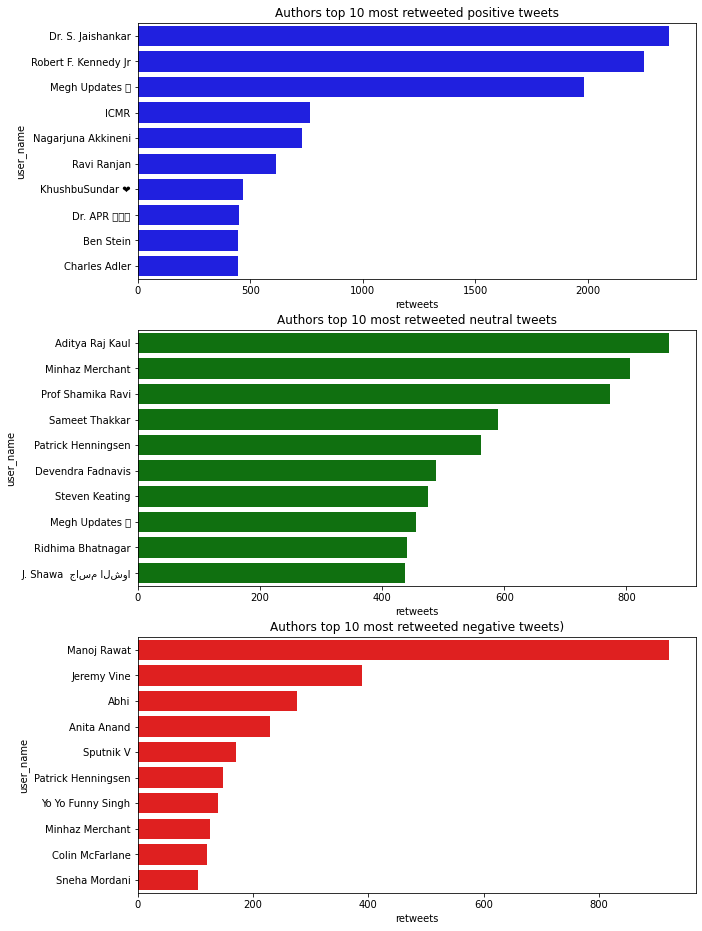

In [210]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 16))
sns.barplot(x="retweets", y="user_name", ax=ax1, palette=["b"],
            data=df_tweety[(df_tweety.sentiment== "positive")].drop_duplicates(subset=["user_name"])
            .sort_values(by=["retweets"], ascending=False)[["user_name", "retweets"]][:10])
ax1.set_title('Authors top 10 most retweeted positive tweets')

sns.barplot(x="retweets", y="user_name", ax=ax2, palette=["g"],
            data=df_tweety[(df_tweety.sentiment == "neutral")].drop_duplicates(subset=["user_name"])
            .sort_values(by=["retweets"], ascending=False)[["user_name", "retweets"]][:10])
ax2.set_title('Authors top 10 most retweeted neutral tweets')

sns.barplot(x="retweets", y="user_name", ax=ax3, palette=["r"],
           data=df_tweety[(df_tweety.sentiment == "negative")].drop_duplicates(subset=["user_name"])
           .sort_values(by=["retweets"], ascending=False)[["user_name", "retweets"]][:10])
ax3.set_title('Authors top 10 most retweeted negative tweets)')

fig.show()

# 6.3 Tweet over time, sentiment conponents

### General

<AxesSubplot:xlabel='day'>

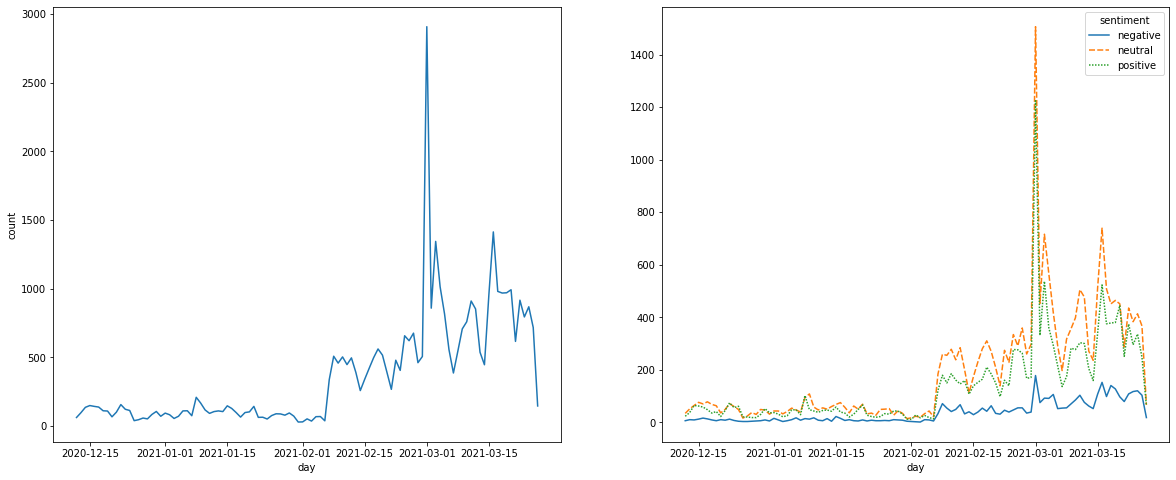

In [211]:
over_days = df_tweety.groupby(['day'])['index'].count().reset_index()
over_days.columns = ['day', 'count']

tweety_wide = pd.pivot_table(df_tweety, index='day', columns='sentiment', values='index', aggfunc=pd.Series.nunique)

plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)

plt.subplot(1, 2, 1)
sns.lineplot(x="day", y="count",
             data=over_days)

plt.subplot(1, 2, 2)
sns.lineplot(data=tweety_wide)

### Most influential 1%

<AxesSubplot:xlabel='day'>

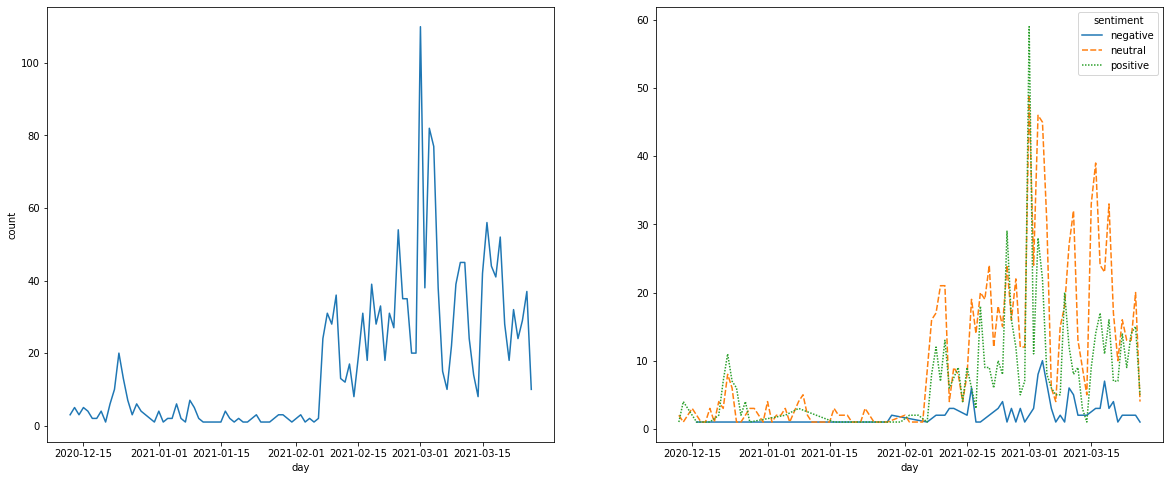

In [212]:
over_days = df_tweety_infl.groupby(['day'])['index'].count().reset_index()
over_days.columns = ['day', 'count']

tweety_wide = pd.pivot_table(df_tweety_infl, index='day', columns='sentiment', values='index', aggfunc=pd.Series.nunique)

plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)

plt.subplot(1, 2, 1)
sns.lineplot(x="day", y="count",
             data=over_days)

plt.subplot(1, 2, 2)
sns.lineplot(data=tweety_wide)

What happened on the first of march, in mid-february and in mid-march?

### Different vaccines over time

<AxesSubplot:xlabel='day'>

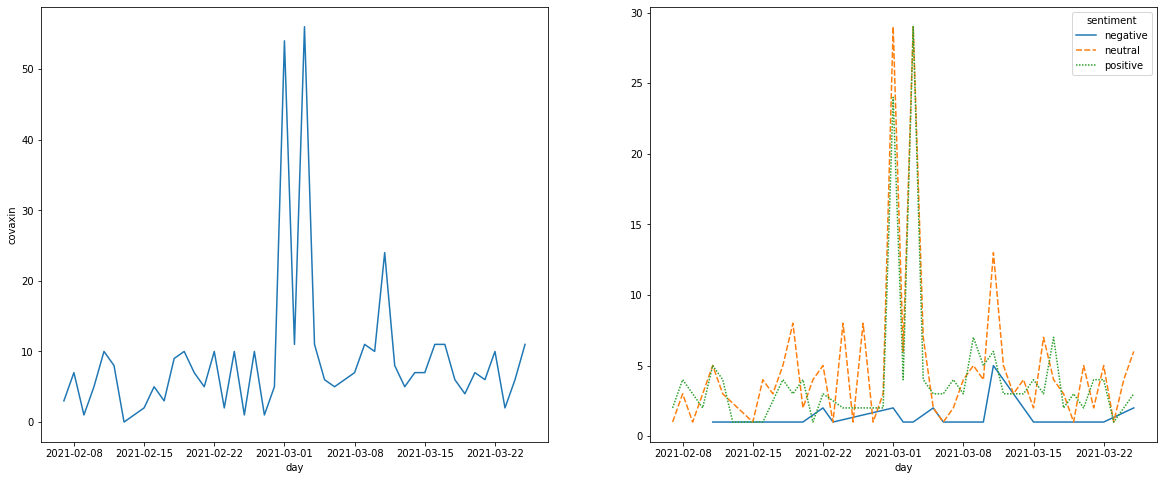

In [213]:
covaxin1 = df_covaxin.groupby(['day'])['covaxin'].sum()#, index='day', columns=['sentiment'], values='index', aggfunc=pd.Series.nunique)
covaxin1 = pd.DataFrame(covaxin1).reset_index()

covaxin2 = pd.pivot_table(df_covaxin, index='day', columns='sentiment', values='index', aggfunc=pd.Series.nunique)

plt.figure(figsize = (20, 8))

plt.subplot(1, 2, 1)
sns.lineplot(x="day", y="covaxin", data=covaxin1)

plt.subplot(1, 2, 2)
sns.lineplot(data=covaxin2)

### Sinovac

<AxesSubplot:xlabel='day'>

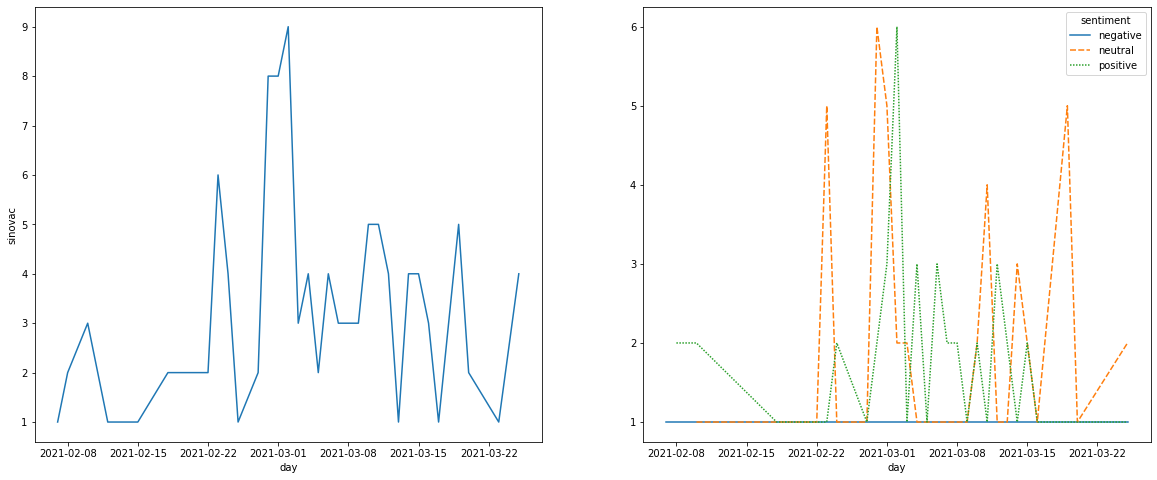

In [214]:
sinovac1 = df_sinovac.groupby(['day'])['sinovac'].sum()#, index='day', columns=['sentiment'], values='index', aggfunc=pd.Series.nunique)
sinovac1 = pd.DataFrame(sinovac1).reset_index()

sinovac = pd.pivot_table(df_sinovac, index='day', columns='sentiment', values='index', aggfunc=pd.Series.nunique)

plt.figure(figsize = (20, 8))

plt.subplot(1, 2, 1)
sns.lineplot(x="day", y="sinovac", data=sinovac1)

plt.subplot(1, 2, 2)
sns.lineplot(data=sinovac)

### Moderna

<AxesSubplot:xlabel='day'>

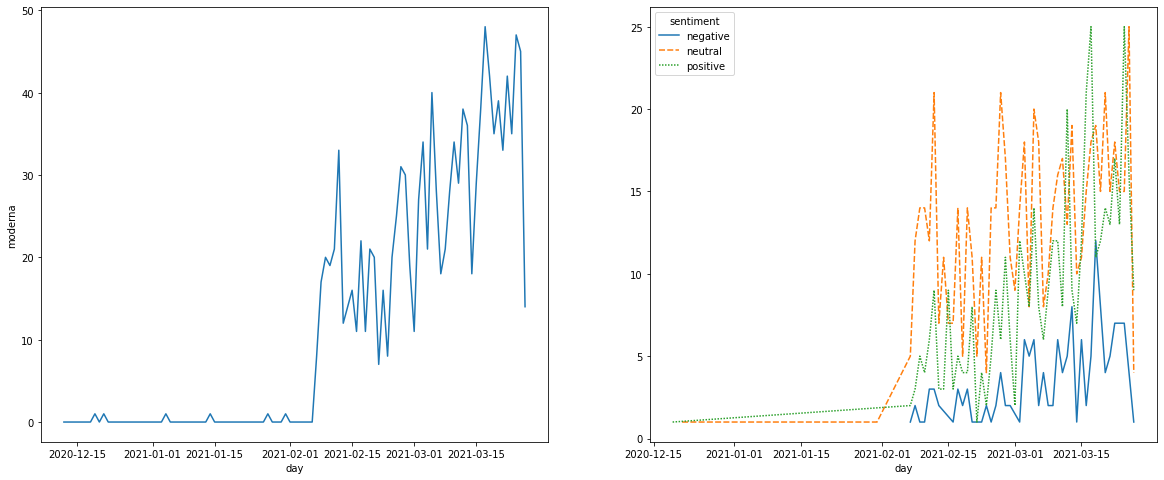

In [215]:
moderna1 = df_tweety_vaccs.groupby(['day'])['moderna'].sum()#, index='day', columns=['sentiment'], values='index', aggfunc=pd.Series.nunique)
moderna1 = pd.DataFrame(moderna1).reset_index()

moderna2 = pd.pivot_table(df_moderna, index='day', columns='sentiment', values='index', aggfunc=pd.Series.nunique)

plt.figure(figsize = (20, 8))

plt.subplot(1, 2, 1)
sns.lineplot(x="day", y="moderna", data=moderna1)

plt.subplot(1, 2, 2)
sns.lineplot(data=moderna2)

### AstraZeneca

<AxesSubplot:xlabel='day'>

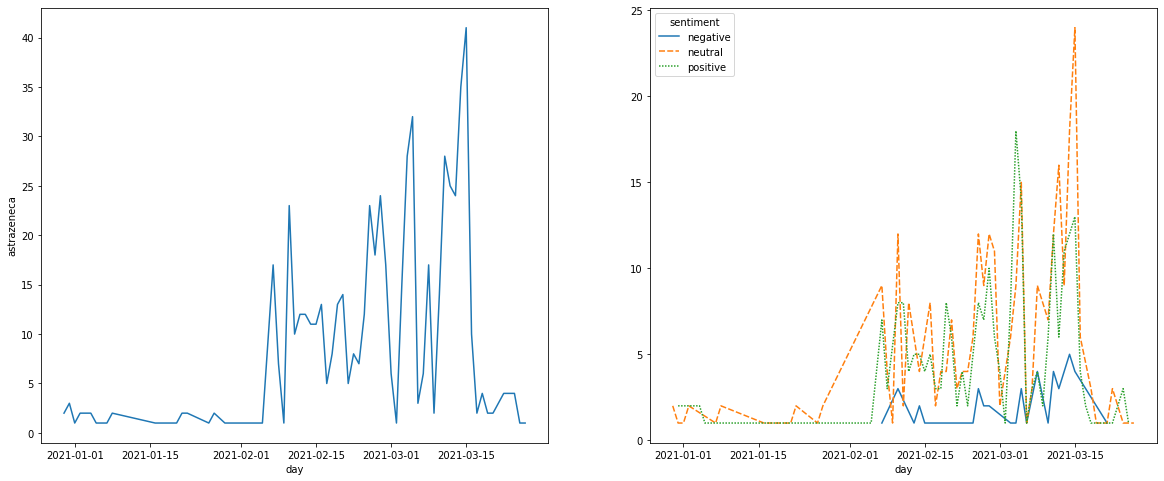

In [216]:
astrazeneca1 = df_astrazeneca.groupby(['day'])['astrazeneca'].count()#, index='day', columns=['sentiment'], values='index', aggfunc=pd.Series.nunique)
astrazeneca1 = pd.DataFrame(astrazeneca1).reset_index()

astrazeneca = pd.pivot_table(df_astrazeneca, index='day', columns='sentiment', values='index', aggfunc=pd.Series.nunique)

plt.figure(figsize = (20, 8))

plt.subplot(1, 2, 1)
sns.lineplot(x="day", y="astrazeneca", data=astrazeneca1)

plt.subplot(1, 2, 2)
sns.lineplot(data=astrazeneca)

<AxesSubplot:xlabel='day'>

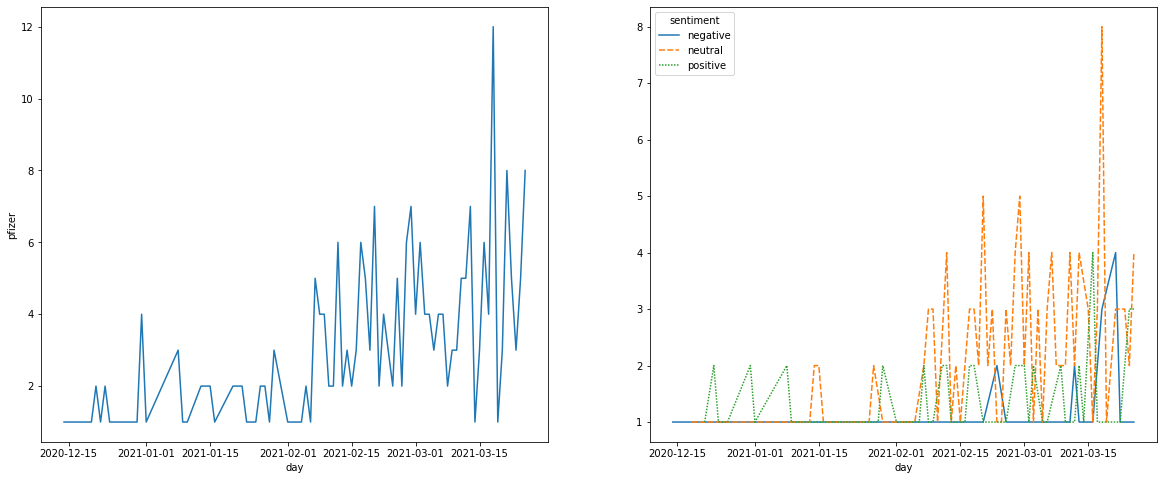

In [217]:
pfizer1 = df_biontech.groupby(['day'])['pfizer'].count()#, index='day', columns=['sentiment'], values='index', aggfunc=pd.Series.nunique)
pfizer1 = pd.DataFrame(pfizer1).reset_index()

pfizer = pd.pivot_table(df_biontech, index='day', columns='sentiment', values='index', aggfunc=pd.Series.nunique)

plt.figure(figsize = (20, 8))

plt.subplot(1, 2, 1)
sns.lineplot(x="day", y="pfizer", data=pfizer1)

plt.subplot(1, 2, 2)
sns.lineplot(data=pfizer)

<AxesSubplot:xlabel='day'>

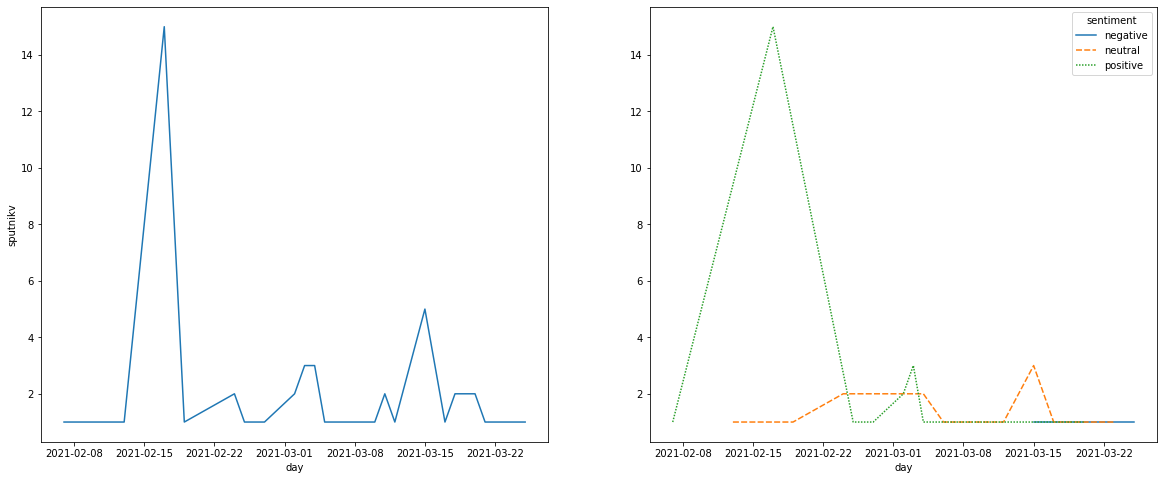

In [218]:
sputnik1 = df_sputnik.groupby(['day'])['sputnikv'].sum()#, index='day', columns=['sentiment'], values='index', aggfunc=pd.Series.nunique)
sputnik1 = pd.DataFrame(sputnik1).reset_index()


sputnik = pd.pivot_table(df_sputnik, index='day', columns='sentiment', values='index', aggfunc=pd.Series.nunique)

plt.figure(figsize = (20, 8))

plt.subplot(1, 2, 1)
sns.lineplot(x="day", y="sputnikv", data=sputnik1)

plt.subplot(1, 2, 2)
sns.lineplot(data=sputnik)

### Unanimous sentiment values VADER, BLOB

In [177]:
blob_sent = pd.read_csv('blob_sent.csv')

In [405]:
blob_sent

,Unnamed: 0,sentiment
0,0,negative
1,1,negative
2,2,neutral
3,3,neutral
4,4,neutral
...,...,...
38542,38542,neutral
38543,38543,neutral
38544,38544,neutral
38545,38545,positive


In [406]:
df_tweety['blob_sent'] = blob_sent['sentiment']

In [233]:
df_unanim = df_tweety[df_tweety['sentiment']==df_tweety['blob_sent']]

In [234]:
df_unanim.shape

(18898, 18)

In [411]:
df_unanim = df_unanim[['index', 'text', 'sentiment']]
df_unanim

,index,text,sentiment
0,1,world wrong side history year hopefully biggest effort ev,negative
1,2,created last 4 years,neutral
2,4,explain need,neutral
3,5,anyone useful advice guidance whether safe whilst breastfeeding,positive
4,6,bit sad claim fame success patriotic competition,negative
...,...,...,...
18893,38534,company importing,neutral
18894,38536,enough priority cases close rolling domestic,neutral
18895,38541,selling contact sales,neutral
18896,38543,planned start mass uzbekistan march,neutral


In [413]:
booleans = {'negative': -1, 'positive': 1, 'neutral': 0}
df_unanim['sentiment'] = df_unanim['sentiment'].map(booleans)

### Create dataframe containing vaccination progress and sentiments over time

In [178]:
tweety_wide = pd.pivot_table(df_tweety, index='day', columns='sentiment', values='index', aggfunc=pd.Series.nunique)

tweety_flat = pd.DataFrame(tweety_wide.to_records()).drop([0, 102, 103]).reset_index()

alltweets_global_vacc_senti = pd.read_csv('Data/df_global.csv')

alltweets_global_vacc_senti[['negative', 'neutral', 'positive']] = tweety_flat[['negative', 'neutral', 'positive']]

alltweets_global_vacc_senti.to_csv('Data/alltweetsglobal_vacc_senti.csv')